In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random, math

In [3]:
def crop_image(img, edge):
    i = 0
    j = 0
    cropped = []
    step_x = img.shape[0]//edge
    step_y = img.shape[1]//edge
    while i < img.shape[0]:
        while j < img.shape[1]:
            if j+step_y <= img.shape[1] and i+step_x <= img.shape[0]:
                cropped.append(img[i:i+step_x, j:j+step_y])
            elif j+step_y > img.shape[1] and i+step_x < img.shape[0]:
                cropped.append(img[i:i+step_x, j:])
            elif j+step_y <= img.shape[1] and i+step_x > img.shape[0]:
                cropped.append(img[i:, j:j+step_y])
            else:
                cropped.append(img[i:, j:])
            j += step_y
        j = 0
        i+=step_x
    return cropped

            

In [4]:
def embroil(cropped, img_size):
    random.shuffle(cropped)
    res = np.zeros(img_size)
    block_num = int(math.sqrt(len(cropped)))
    block_size = cropped[0].shape[0]
    i = 0
    j = 0
    k = 0
    while i < block_num:
        while j < block_num:
            res[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = cropped[k]
            k += 1
            j += 1
        j = 0
        i += 1
    return res


In [5]:
def normalize(arr):
    mean = arr.mean()
    std = np.std(arr)
    return (arr - mean)/std
    
def matchTemplate(img, template):
    filter_size = template.shape[0]
    mask = np.zeros((img.shape[0] - filter_size + 1, img.shape[1] - filter_size + 1))
    i = 0
    j = 0
    template = normalize(template)
    while i < mask.shape[0]:
        while j < mask.shape[1]:
            mask[i][j] = np.multiply(normalize(img[i:i+filter_size, j:j+filter_size]), template).sum()
            j += 1
        j = 0
        i += 1
    return mask

In [6]:
def puzzle_solver(cropped_img, img):
    img_puzzle = np.zeros(img.shape)
    for k in range(len(cropped_img)):
        w, h = cropped_img[k].shape[::-1] 
        img_copy = img.copy()

#         res = cv2.matchTemplate(img_copy,cropped_img[k],cv2.TM_CCOEFF_NORMED) 
#         This function write by me. Don't use it because it too slow @@
        res = matchTemplate(img_copy, cropped_img[k])
        max_sim = np.amax(res)
        loc = np.where(res >= max_sim)
        x = loc[0][0]
        y = loc[1][0]

        img_puzzle[x:x+h, y:y+w] = cropped_img[k]
    return img_puzzle


In [8]:
img = cv2.imread('Lenna.png', 0)
img = cv2.resize(img, dsize=(30, 30), interpolation=cv2.INTER_CUBIC)
cropped_img = crop_image(img, 6)

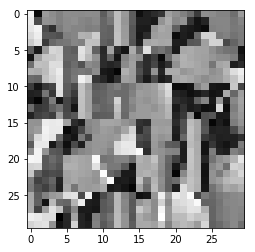

In [9]:
mixed = embroil(cropped_img, img.shape)
plt.imshow(mixed, cmap='gray')

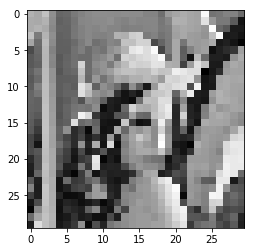

In [10]:
plt.imshow(puzzle_solver(cropped_img, img), cmap='gray')